In [1]:
# import standard libraries
#!pip install autograd
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam, sgd
from autograd import scipy as sp
import autograd.numpy.random as npr
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys

# import our libraries
import bayes_helpers as bh
from utils import generate_data
from utils import run_toy_nn
from feed_forward import Feedforward
from nlm import NLM

from optimizers import *

In [2]:
# Import the data
df = pd.read_csv("HW8_data.csv")
x_train = np.array(df["x"])
y_train = np.array(df["y"])

# Create a test set
x_test = np.linspace(x_train.min()-1,x_train.max()+1,200)

x_train = x_train.reshape((1, -1))
y_train = y_train.reshape((1, -1))
x_test = x_test.reshape((1, -1))

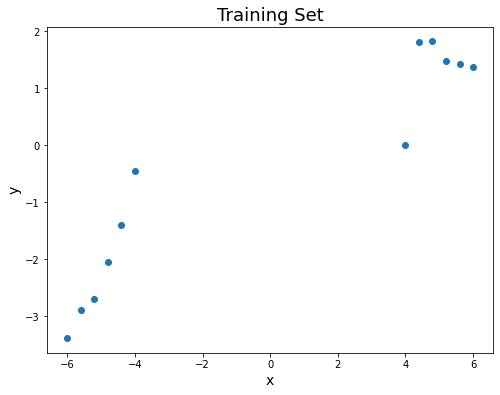

In [3]:
# Create a plot of the training set
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0])
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set', fontsize = 18);

In [4]:
number_of_points = 50
x_train, y_train, x_test = generate_data(number_of_points)

### Test optimizers with FeedForward

In [5]:
# Define the relu activation function
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


# Define the neural network model parameters
width = 50
hidden_layers = 2
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

### Adam

 Iteration 900 lower bound 499.68246572136815; gradient mag: 510.04852120477948

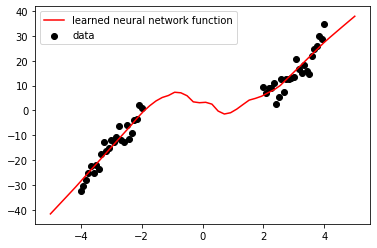

In [6]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':1000, 
          'random_restarts':1,
          'optimizer':'adam'}
rand_state = 0
random = np.random.RandomState(rand_state)

nn = Feedforward(architecture, random=random)

nn.fit(x_train, y_train, params)

#predict on the test x-values
y_test_pred = nn.forward(nn.weights, x_test)

#visualize the function learned by the neural network
plt.scatter(x_train.flatten(), y_train.flatten(), color='black', label='data')
plt.plot(x_test.flatten(), y_test_pred.flatten(), color='red', label='learned neural network function')
plt.legend(loc='best')
plt.show()

### Steepest Descent

In [8]:
# Set the parameters (use steepest descent as the optimizer)
params = {'random_restarts': 3,
          'max_iteration': 500,
          'optimizer': steepest_descent}

# Instantiate the FeedForward object
nn = Feedforward(architecture, random=None, weights=None, objective_function=None)

# Fit the NN to the training data
nn.fit(x_train, y_train, params)

# Create predictions
predictions = nn.forward(nn.weights, x_test, final_layer_out=False)

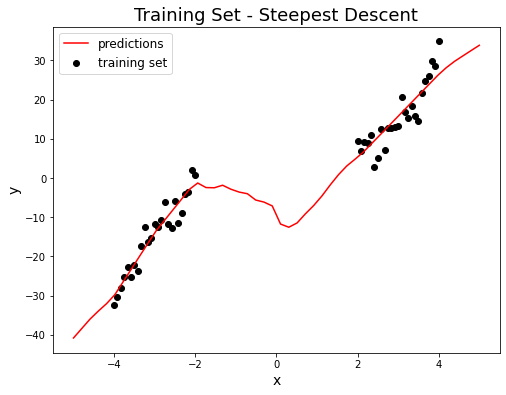

In [9]:
# Create a plot of the training set and NN predictions
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0], c='k', label='training set')
ax.plot(x_test[0], predictions.flatten(), c='r', label='predictions')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set - Steepest Descent', fontsize = 18)
ax.legend(fontsize=12);

### Newton's Method

In [8]:
# Set the parameters (use steepest descent as the optimizer)
params = {'random_restarts': 3,
          'max_iteration': 500,
          'optimizer': newton_method}

# Instantiate the FeedForward object
nn = Feedforward(architecture, random=None, weights=None, objective_function=None)

# Fit the NN to the training data
nn.fit(x_train, y_train, params)

# Create predictions
predictions = nn.forward(nn.weights, x_test, final_layer_out=False)

(1, 2701)
(1, 2701)
(1, 2701, 1, 2701)


LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
# Create a plot of the training set and NN predictions
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0], c='k', label='training set')
ax.plot(x_test[0], predictions.flatten(), c='r', label='predictions')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set - Newton\'s Method', fontsize = 18)
ax.legend(fontsize=12);

### BFGS

In [6]:
# Set the parameters (use steepest descent as the optimizer)
params = {'random_restarts': 3,
          'max_iteration': 5000,
          'optimizer': BFGS}

# Instantiate the FeedForward object
nn = Feedforward(architecture, random=None, weights=None, objective_function=None)

# Fit the NN to the training data
nn.fit(x_train, y_train, params)

# Create predictions
predictions = nn.forward(nn.weights, x_test, final_layer_out=False)

/Users/VICTOR/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/VICTOR/anaconda3/lib/python3.6/site-packages/autograd/numpy/linalg.py:89: RuntimeWarning: invalid value encountered in true_divide
  return expand(g / ans) * x


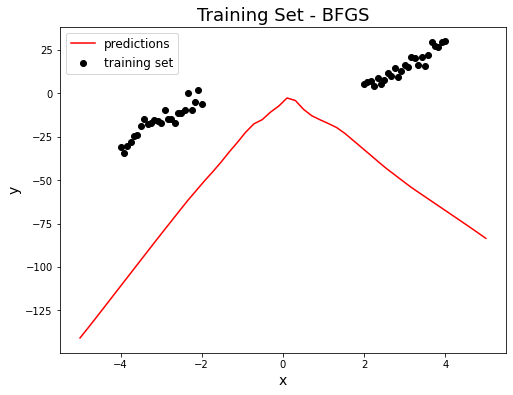

In [7]:
# Create a plot of the training set and NN predictions
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0], c='k', label='training set')
ax.plot(x_test[0], predictions.flatten(), c='r', label='predictions')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set - BFGS', fontsize = 18)
ax.legend(fontsize=12);

### Conjugate Gradient

In [ ]:
# Set the parameters (use steepest descent as the optimizer)
params = {'random_restarts': 3,
          'max_iteration': 5000,
          'optimizer': conjugate_gradient}

# Instantiate the FeedForward object
nn = Feedforward(architecture, random=None, weights=None, objective_function=None)

# Fit the NN to the training data
nn.fit(x_train, y_train, params)

# Create predictions
predictions = nn.forward(nn.weights, x_test, final_layer_out=False)

In [ ]:
# Create a plot of the training set and NN predictions
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x_train[0], y_train[0], c='k', label='training set')
ax.plot(x_test[0], predictions.flatten(), c='r', label='predictions')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
plt.title('Training Set - Conjugate Gradient', fontsize = 18)
ax.legend(fontsize=12);

### Test optimizers with NLM

In [6]:
import bayes_helpers as bh

In [7]:
# Define the relu activation function
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


# Define the neural network model parameters
width = 100
hidden_layers = 2
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

In [8]:
# Set the paramters
prior_var = 1.0
y_var = 2.0
regularization_param_nlm = 5

# Initialize the NLM
nlm = NLM(prior_var, y_var, regularization_param_nlm, architecture, random_state = np.random.RandomState(0))

### Steepest Descent

In [13]:
# Set the parameters
params = {'max_iteration':2000, 
          'random_restarts':3,
          'optimizer': steepest_descent}

# Fit the NLM to the training set
nlm.train(x_train, y_train, params)

# Create predictions
posterior_predictives, posterior_predictive_samples = nlm.predict(x_test)


Done Training


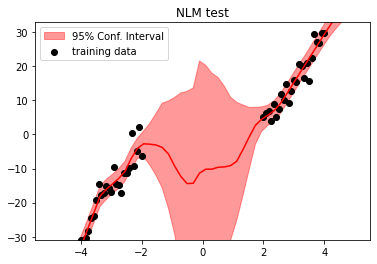

In [14]:
# Plot the training data, predictions, and 95% CI
bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,"NLM test")

### Newton's Method

In [9]:
# Set the parameters
params = {'max_iteration':2000, 
          'random_restarts':3,
          'optimizer': newton_method}

# Fit the NLM to the training set
nlm.train(x_train, y_train, params)

# Create predictions
posterior_predictives, posterior_predictive_samples = nlm.predict(x_test)

/Users/VICTOR/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/VICTOR/anaconda3/lib/python3.6/site-packages/autograd/numpy/linalg.py:89: RuntimeWarning: invalid value encountered in true_divide
  return expand(g / ans) * x
/Users/VICTOR/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/VICTOR/anaconda3/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: invalid value encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/Users/VICTOR/anaconda3/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:34: RuntimeWarning: overflow encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),
/Users/VICTOR/anaconda3/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:52: RuntimeWar

KeyboardInterrupt: 

In [ ]:
# Plot the training data, predictions, and 95% CI
bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,"NLM test")

### BFGS

In [16]:
# Set the parameters
params = {'max_iteration':2000, 
          'random_restarts':3,
          'optimizer': BFGS}

# Fit the NLM to the training set
nlm.train(x_train, y_train, params)

# Create predictions
posterior_predictives, posterior_predictive_samples = nlm.predict(x_test)

/Users/VICTOR/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Users/VICTOR/anaconda3/lib/python3.6/site-packages/autograd/numpy/linalg.py:89: RuntimeWarning: invalid value encountered in true_divide
  return expand(g / ans) * x



Done Training


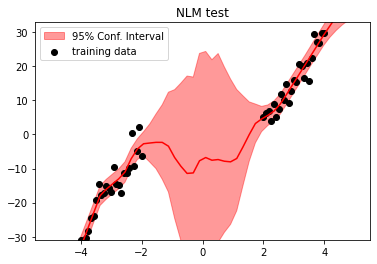

In [17]:
# Plot the training data, predictions, and 95% CI
bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,"NLM test")

### Conjugate Gradient

In [10]:
# Set the parameters
params = {'max_iteration':2000, 
          'random_restarts':3,
          'optimizer': conjugate_gradient}

# Fit the NLM to the training set
nlm.train(x_train, y_train, params)

# Create predictions
posterior_predictives, posterior_predictive_samples = nlm.predict(x_test)


Done Training


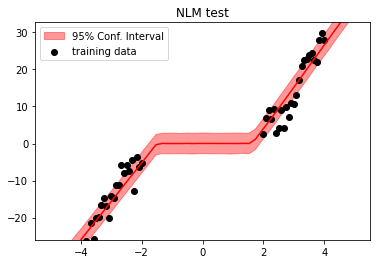

In [11]:
# Plot the training data, predictions, and 95% CI
bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,"NLM test")